# Decision Tree Example

### 라이브러리 선언

In [1]:
import numpy as np
import pandas as pd 

# 모델 라이브러리 선언
from sklearn import datasets, tree

# 모델 정확도 라이브러리 선언
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# CSV 파일을 읽어 DataFrame 변수에 저장하기
featuresData = pd.read_csv("../dataset./feature_regression_example.csv")
featuresData.head()

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155


### [실습] 1. 타입통합 및 특성숫자 타입 변환

In [2]:
# 데이터 타입 표준화
featuresData["YEARWEEK"] = featuresData.YEARWEEK.astype(int)
featuresData["YEAR"] = featuresData.YEARWEEK.astype(int)
featuresData["WEEK"] = featuresData.YEARWEEK.astype(int)

In [3]:
featuresData.dtypes

REGIONID         object
PRODUCTGROUP     object
PRODUCT          object
ITEM             object
YEARWEEK          int32
YEAR              int32
WEEK              int32
QTY               int64
HOLIDAY          object
HCLUS             int64
PROMOTION        object
PRO_PERCENT     float64
dtype: object

In [4]:
# 특성 타입 추가
featuresData["HO_YN"] = np.where(featuresData.HOLIDAY == "Y", 1,0)
featuresData["PRO_YN"] = np.where(featuresData.PROMOTION == "Y", 1,0)
featuresData.head()

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HO_YN,PRO_YN
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,201501,201501,1225,Y,1,Y,0.209442,1,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,201502,201502,968,N,4,Y,0.209442,0,1
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,201503,201503,1209,N,4,Y,0.208155,0,1
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,201504,201504,1810,Y,2,Y,0.208155,1,1
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,201505,201505,1773,N,4,Y,0.208155,0,1


In [5]:
# 데이터 조회
featuresData = featuresData[ (featuresData.YEARWEEK >= 201501) & \
                             (featuresData.YEARWEEK <= 201652)]
featuresData.head()
print(featuresData.YEARWEEK.min())
print(featuresData.YEARWEEK.max())

201501
201652


### 2. 특성선정 및 데이터 분리

In [6]:
featuresData.corr()

,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT,HO_YN,PRO_YN
YEARWEEK,1.000000,1.000000,1.000000,0.112267,-0.071586,0.404889,0.049867,0.205916
YEAR,1.000000,1.000000,1.000000,0.112267,-0.071586,0.404889,0.049867,0.205916
WEEK,1.000000,1.000000,1.000000,0.112267,-0.071586,0.404889,0.049867,0.205916
QTY,0.112267,0.112267,0.112267,1.000000,-0.537230,0.700195,0.505932,0.612451
HCLUS,-0.071586,-0.071586,-0.071586,-0.537230,1.000000,-0.545619,-0.974601,-0.374072
PRO_PERCENT,0.404889,0.404889,0.404889,0.700195,-0.545619,1.000000,0.487062,0.898554
HO_YN,0.049867,0.049867,0.049867,0.505932,-0.974601,0.487062,1.000000,0.365148
PRO_YN,0.205916,0.205916,0.205916,0.612451,-0.374072,0.898554,0.365148,1.000000


In [7]:
# 상관관계 확인
corrDf = featuresData.corr()
corrDf.head()

,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT,HO_YN,PRO_YN
YEARWEEK,1.000000,1.000000,1.000000,0.112267,-0.071586,0.404889,0.049867,0.205916
YEAR,1.000000,1.000000,1.000000,0.112267,-0.071586,0.404889,0.049867,0.205916
WEEK,1.000000,1.000000,1.000000,0.112267,-0.071586,0.404889,0.049867,0.205916
QTY,0.112267,0.112267,0.112267,1.000000,-0.537230,0.700195,0.505932,0.612451
HCLUS,-0.071586,-0.071586,-0.071586,-0.537230,1.000000,-0.545619,-0.974601,-0.374072


In [8]:
# 인덱스컬럼 초기화
corrResult = corrDf.reset_index()

In [9]:
corrResult

,index,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT,HO_YN,PRO_YN
0,YEARWEEK,1.000000,1.000000,1.000000,0.112267,-0.071586,0.404889,0.049867,0.205916
1,YEAR,1.000000,1.000000,1.000000,0.112267,-0.071586,0.404889,0.049867,0.205916
2,WEEK,1.000000,1.000000,1.000000,0.112267,-0.071586,0.404889,0.049867,0.205916
3,QTY,0.112267,0.112267,0.112267,1.000000,-0.537230,0.700195,0.505932,0.612451
4,HCLUS,-0.071586,-0.071586,-0.071586,-0.537230,1.000000,-0.545619,-0.974601,-0.374072
5,PRO_PERCENT,0.404889,0.404889,0.404889,0.700195,-0.545619,1.000000,0.487062,0.898554
6,HO_YN,0.049867,0.049867,0.049867,0.505932,-0.974601,0.487062,1.000000,0.365148
7,PRO_YN,0.205916,0.205916,0.205916,0.612451,-0.374072,0.898554,0.365148,1.000000


In [10]:
# 상관관계 계수 비율 선정
featuresStd = 0.6

In [11]:
# Feature 선택
features = corrResult[ (corrResult.QTY != 1) & 
            (abs(corrResult.QTY) > featuresStd)]["index"].tolist()
features

['PRO_PERCENT', 'PRO_YN']

In [12]:
label = ['QTY']
label

['QTY']

In [13]:
features

['PRO_PERCENT', 'PRO_YN']

In [14]:
# 데이터 분리
yearweekStd = 201630

In [15]:
trainingData_features = featuresData[featuresData.YEARWEEK <= yearweekStd][features]
trainingData_label = featuresData[featuresData.YEARWEEK <= yearweekStd][label]
testData_features = featuresData[featuresData.YEARWEEK > yearweekStd][features]
testData_label = featuresData[featuresData.YEARWEEK > yearweekStd]

### 3. 모델선언 및 학습

In [16]:
# depth = 100~200

In [17]:
# Define Model
model_method = tree.DecisionTreeRegressor()

In [18]:
# Define Model
#model_method = linear_model.LinearRegression()

In [19]:
# Learning (Feature & Label)
model = model_method.fit(trainingData_features, trainingData_label)

In [20]:
model

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

### 4. 예측

In [21]:
predict = model.predict(testData_features)

In [22]:
predict

array([2395.11111111, 2395.11111111,  335.52173913, 1434.6       ,
       1434.6       , 1434.6       , 1434.6       , 1434.6       ,
       2395.11111111, 2395.11111111, 2395.11111111, 2395.11111111,
        335.52173913, 2193.8       , 2193.8       , 2193.8       ,
       2193.8       , 2193.8       , 2193.8       , 2193.8       ,
       2193.8       , 2193.8       ])

### [실습] 5. 데이터 정리

In [23]:
### 데이터프레임으로 변환
predictData = pd.DataFrame(predict)

In [24]:
### 컬럼명 주입
predictData.columns = ["PREDICT"]
predictData.head()

,PREDICT
0,2395.111111
1,2395.111111
2,335.521739
3,1434.600000
4,1434.600000


In [25]:
### 테스트데이터 인덱스 초기화
testDataFinal = testData_label.reset_index(drop=True)
testDataFinal.head(2)

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HO_YN,PRO_YN
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201631,201631,201631,1522,N,4,Y,0.280258,0,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201632,201632,201632,2100,N,4,Y,0.280258,0,1


In [26]:
### 컬럼 붙이기 (index 끼리)
finalResult = pd.concat([testDataFinal, predictData], axis = 1)
finalResult.head(2)

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HO_YN,PRO_YN,PREDICT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201631,201631,201631,1522,N,4,Y,0.280258,0,1,2395.111111
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201632,201632,201632,2100,N,4,Y,0.280258,0,1,2395.111111


### 6. 정확도 측정

In [27]:
import math

In [28]:
mean_absolute_error(finalResult['QTY'], finalResult['PREDICT'])  

438.7585419411507

In [29]:
math.sqrt(mean_squared_error(finalResult['QTY'], finalResult['PREDICT']) )

592.9036645666129

In [30]:
r2_score(finalResult['QTY'], finalResult['PREDICT'])  

0.2470949709780369

In [31]:
finalResult.to_csv("./supervisedresult.csv")

In [32]:
featuresData2 = featuresData[featuresData.YEARWEEK <= yearweekStd]

### 결과 시각화 및 분석

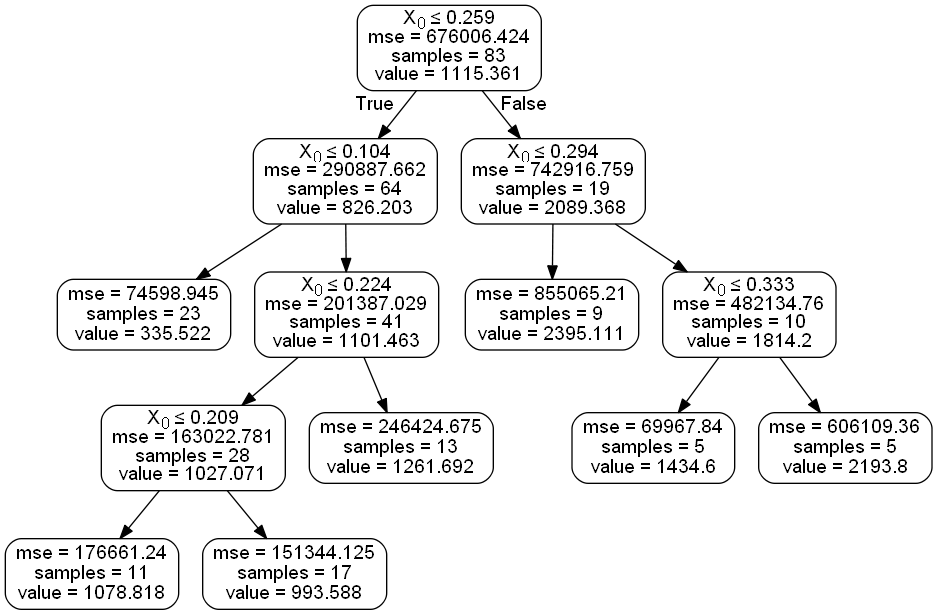

In [33]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, 
                rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())